In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

In [57]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# Load Dataset

In [58]:
df = pd.read_csv("data.csv")

In [59]:
df.shape

(569, 33)

In [60]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [62]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [63]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [64]:
df.duplicated().sum()

np.int64(0)

In [65]:
df = df.drop(columns=['id','Unnamed: 32'])

In [66]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [68]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
33,M,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,...,24.150,30.90,161.40,1813.0,0.15090,0.6590,0.60910,0.17850,0.3672,0.11230
385,M,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,...,15.790,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836
301,B,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,...,13.460,23.07,88.13,551.3,0.10500,0.2158,0.19040,0.07625,0.2685,0.07764
358,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,...,9.981,17.70,65.27,302.0,0.10150,0.1248,0.09441,0.04762,0.2434,0.07431
402,B,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,14.130,24.61,96.31,621.9,0.09329,0.2318,0.16040,0.06608,0.3207,0.07247


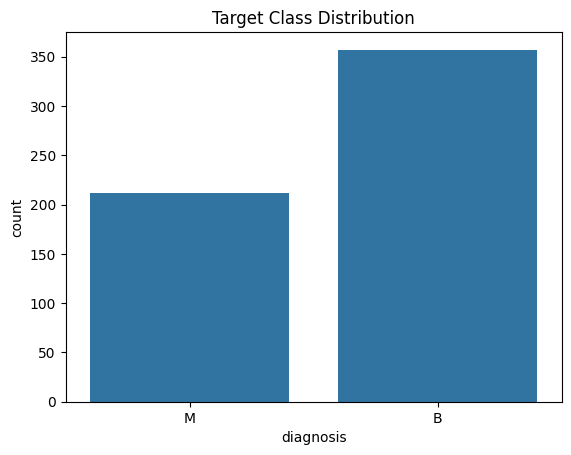

In [69]:
sns.countplot(x='diagnosis', data=df)
plt.title("Target Class Distribution")
plt.show()

In [70]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [71]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [72]:
combined_df = X.copy()
combined_df['diagnosis'] = y

In [73]:
print("\n=== Preview of Combined DataFrame ===")
print(combined_df.head())


=== Preview of Combined DataFrame ===
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perime

In [74]:
corr = df.corr()
target_corr = corr['diagnosis'].drop('diagnosis').abs().sort_values(ascending=False)
print("Top features correlated with diagnosis:")
display(target_corr.head(12))

Top features correlated with diagnosis:


,diagnosis
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610


In [75]:
target_col = 'diagnosis' if 'diagnosis' in df.columns else None
if target_col is None:
    print("No column named 'diagnosis' found. Please set `target_col` to your label column name.")
else:
    print("Target distribution:")
    display(df[target_col].value_counts(normalize=False))
    display(df[target_col].value_counts(normalize=True))

Target distribution:


,count
diagnosis,
0,357
1,212


,proportion
diagnosis,
0,0.627417
1,0.372583


In [76]:
df.dtypes

,0
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [77]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numeric columns: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Categorical columns: Index([], dtype='object')


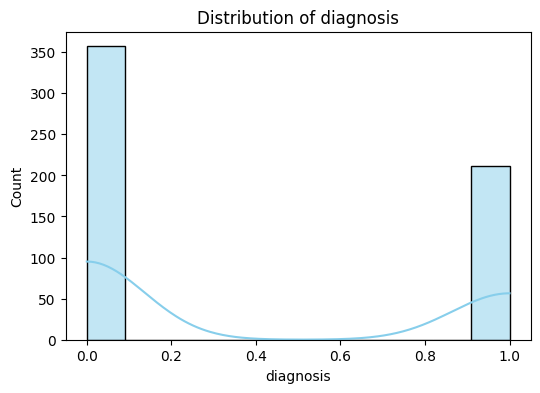

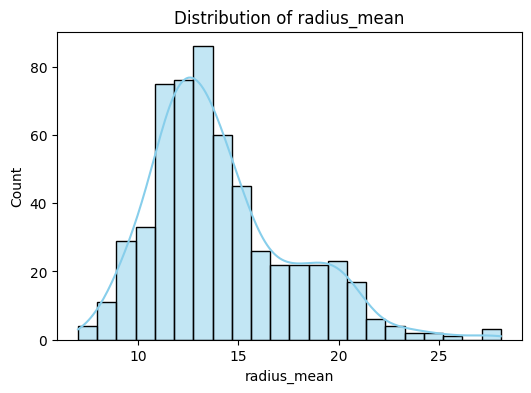

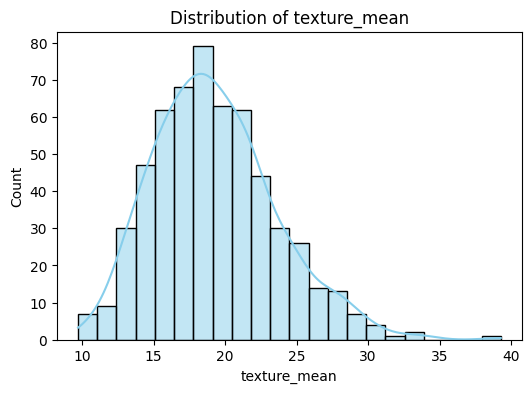

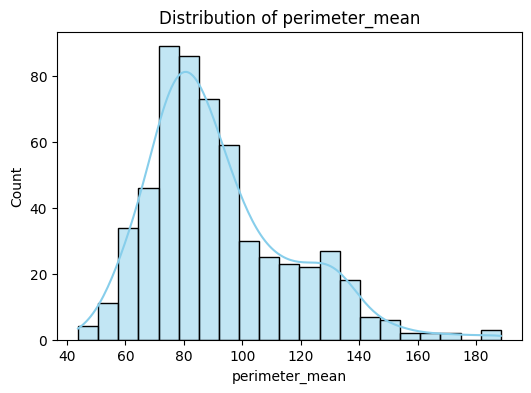

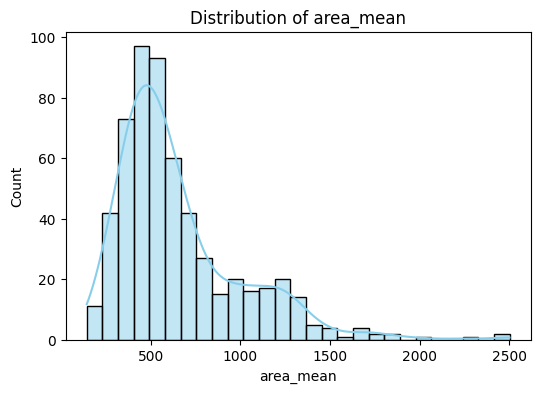

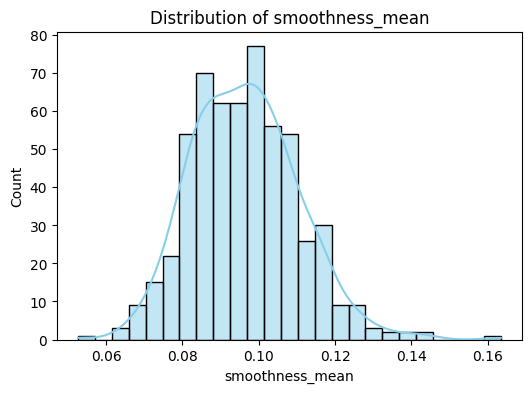

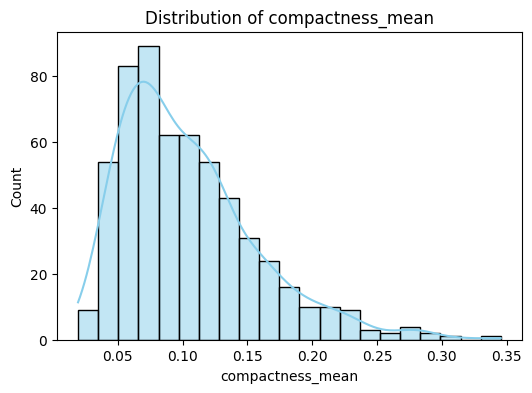

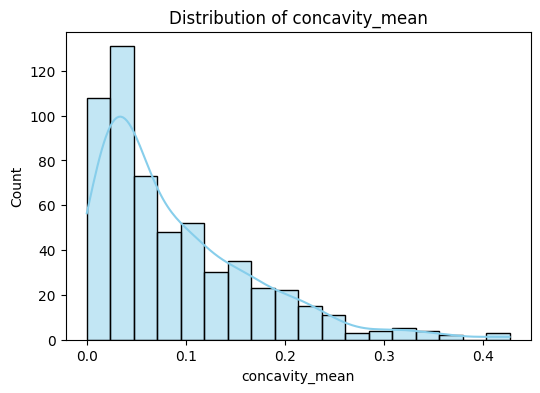

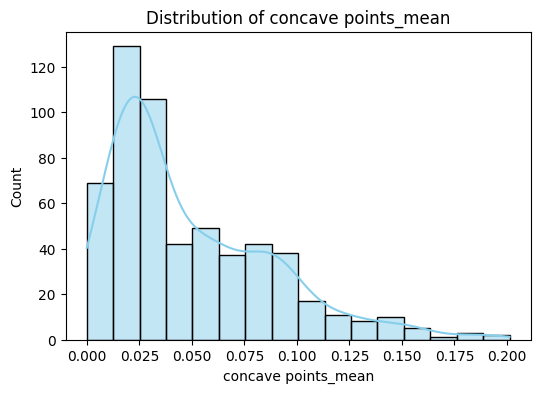

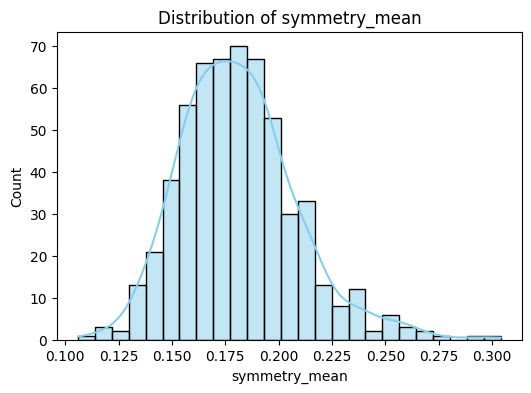

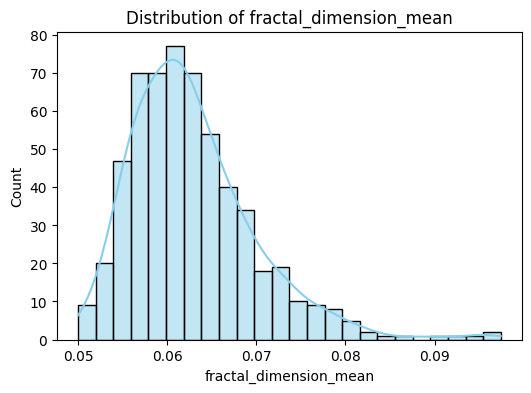

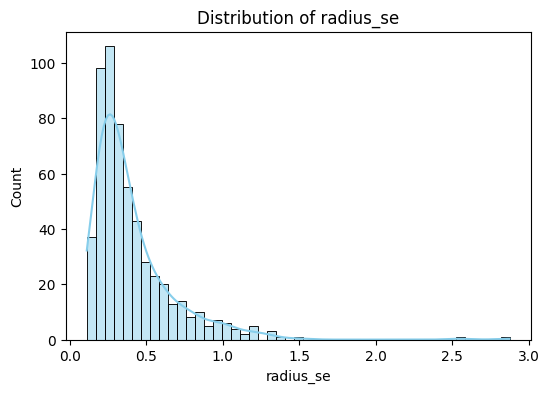

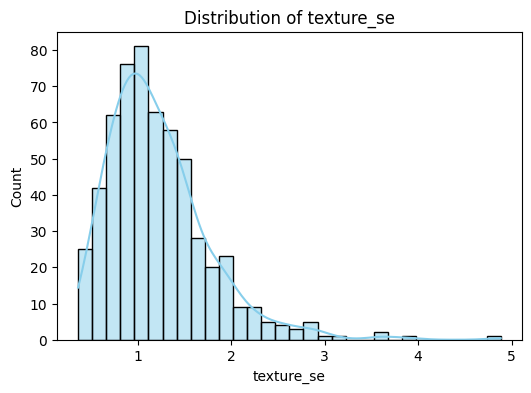

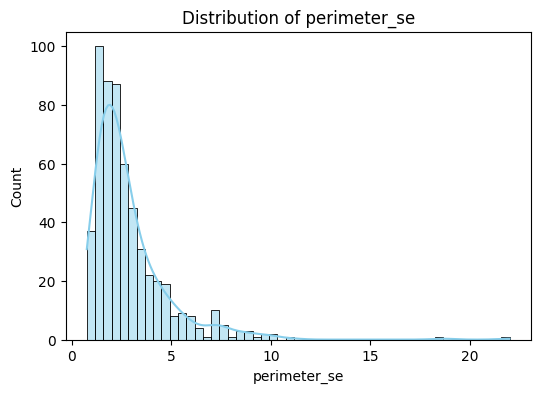

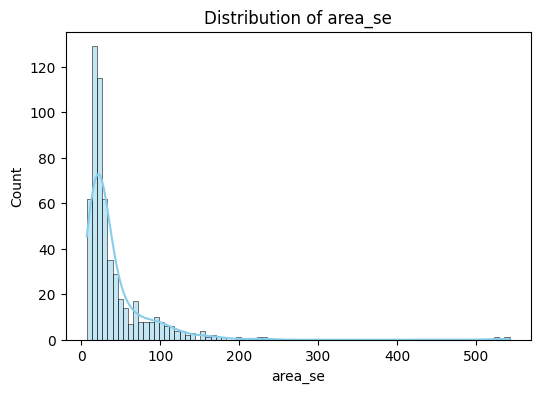

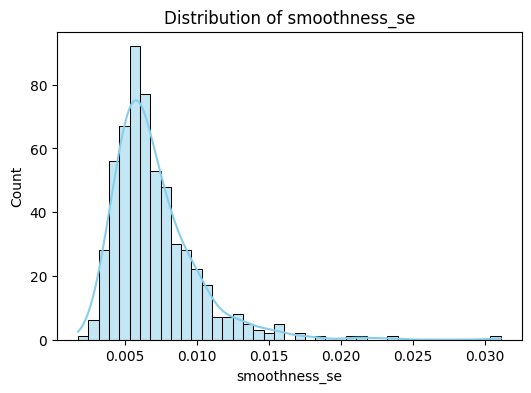

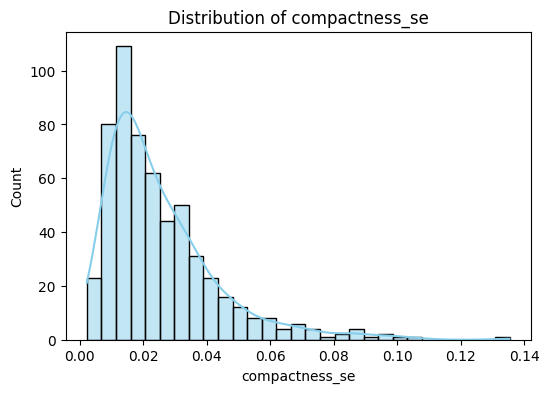

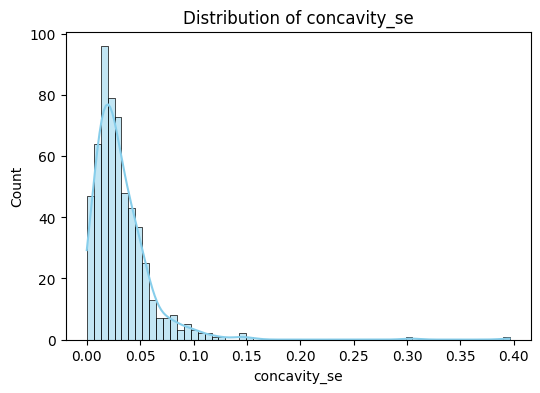

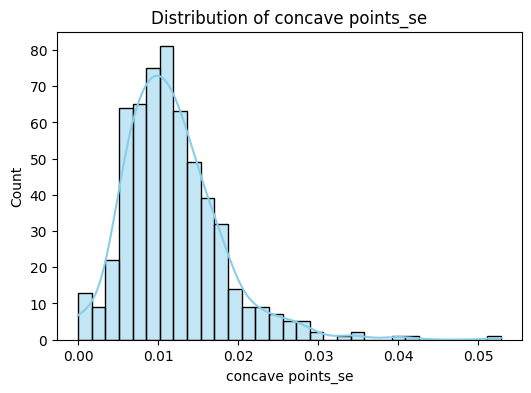

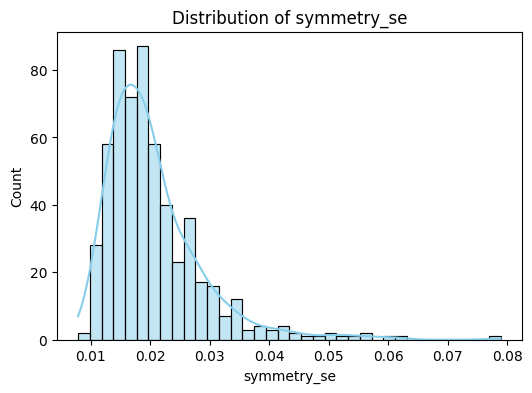

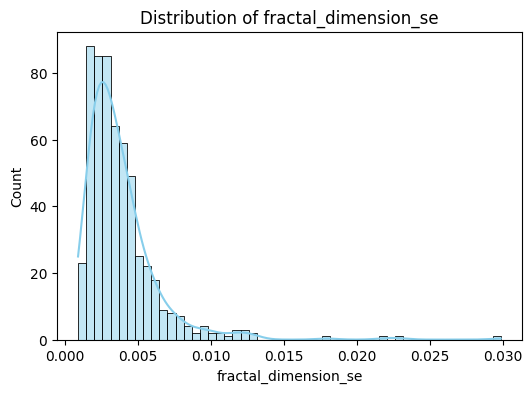

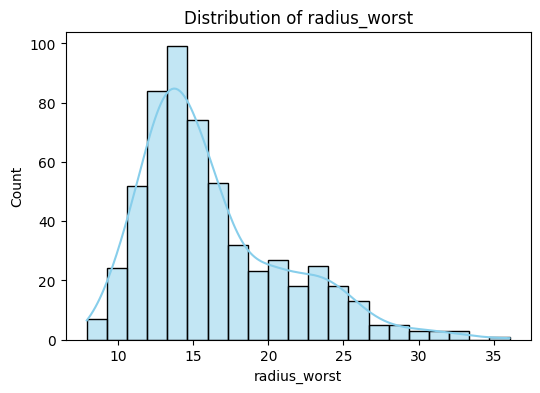

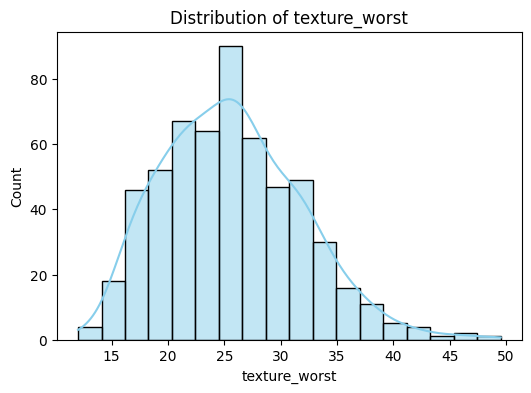

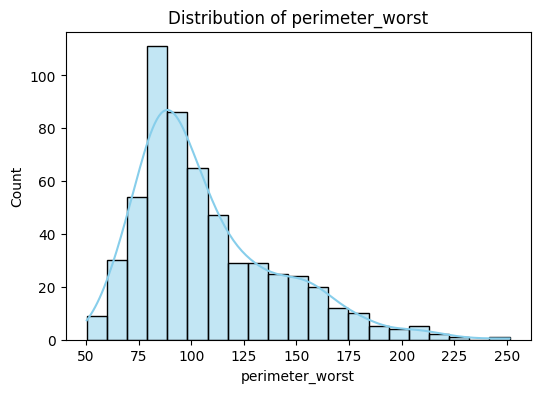

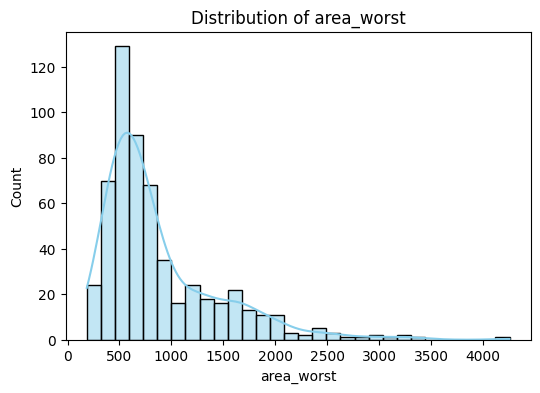

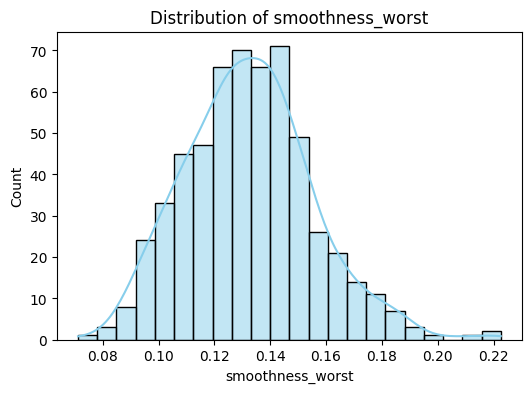

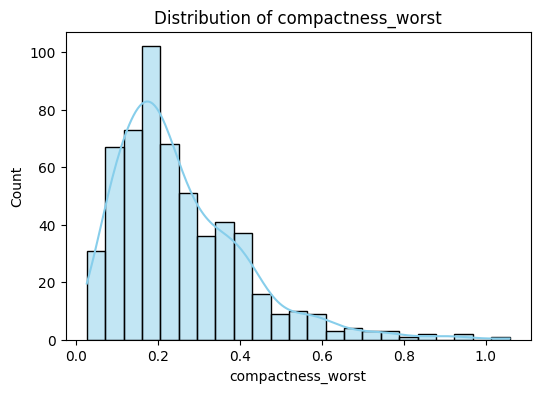

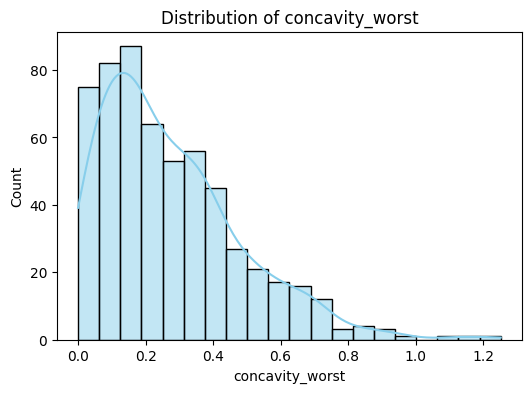

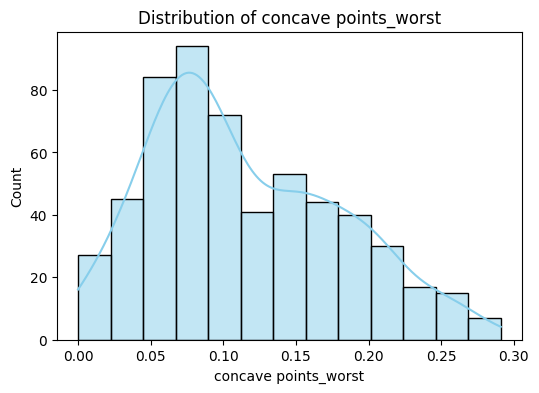

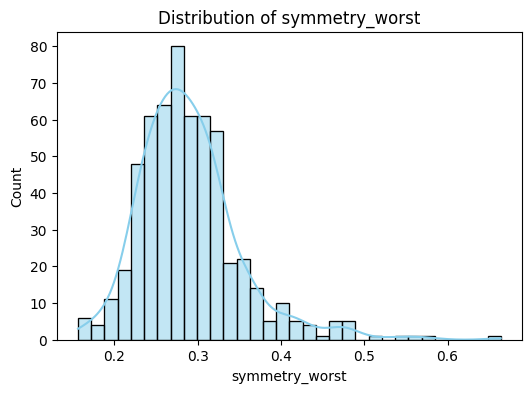

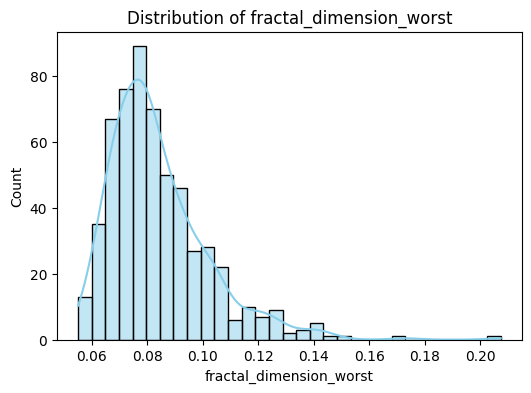

In [78]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

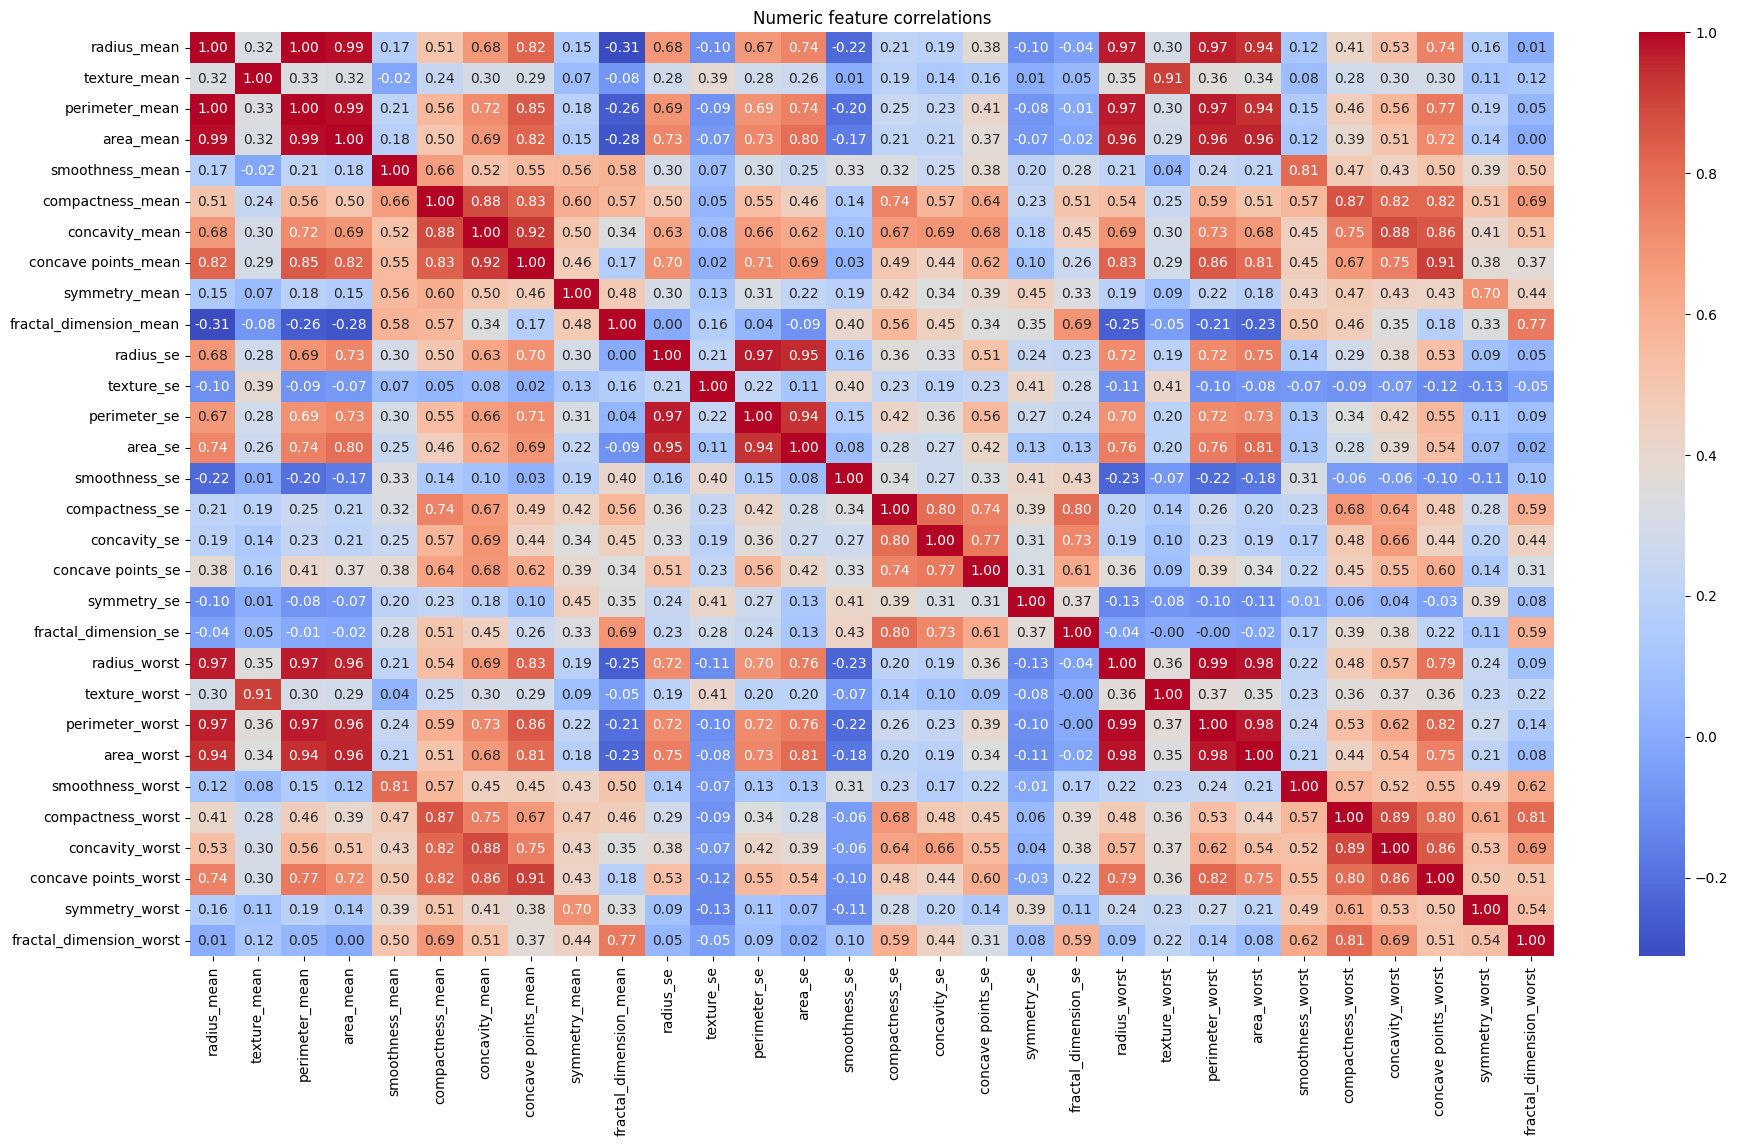

In [79]:
# Correlation heatmap (numeric)
plt.figure(figsize=(22,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numeric feature correlations')
plt.show()

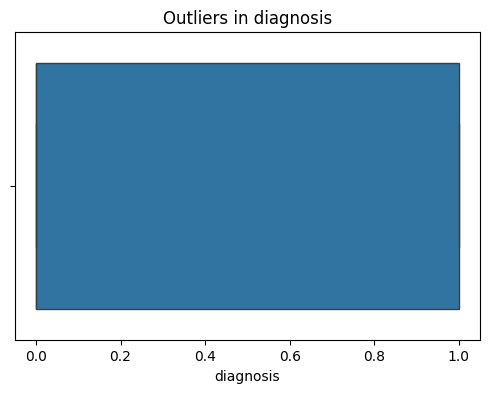

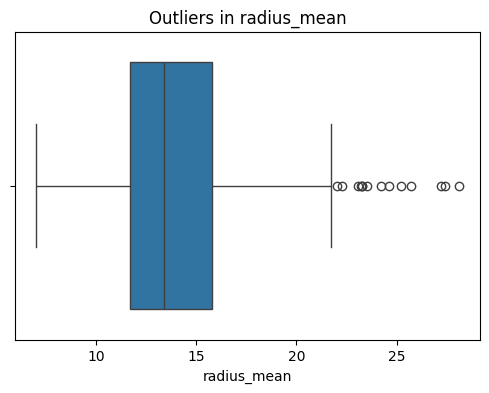

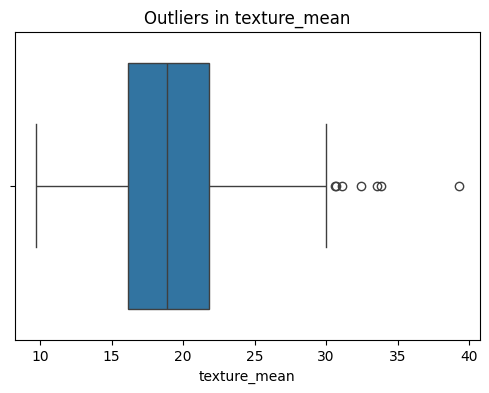

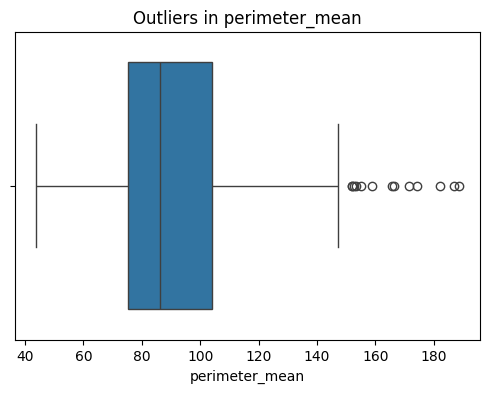

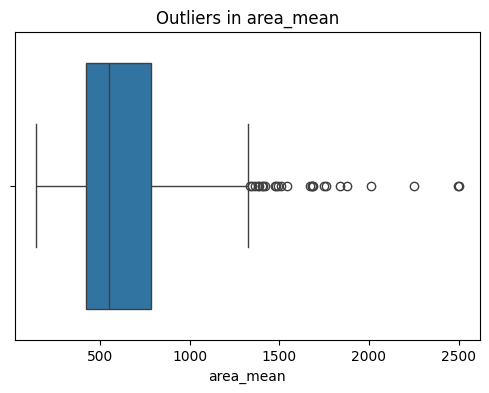

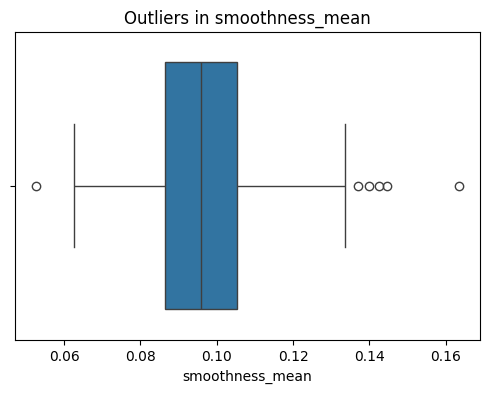

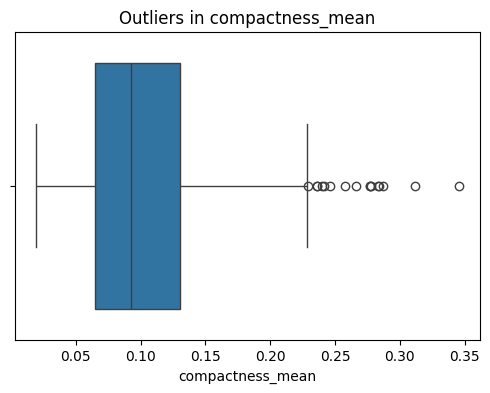

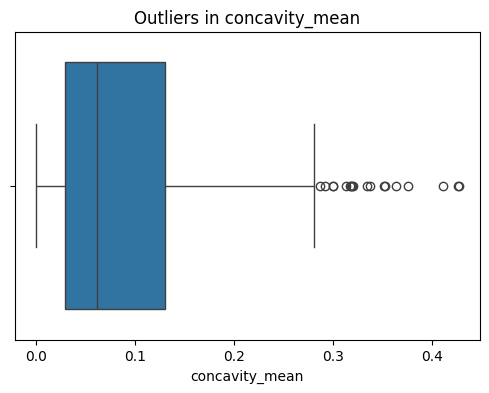

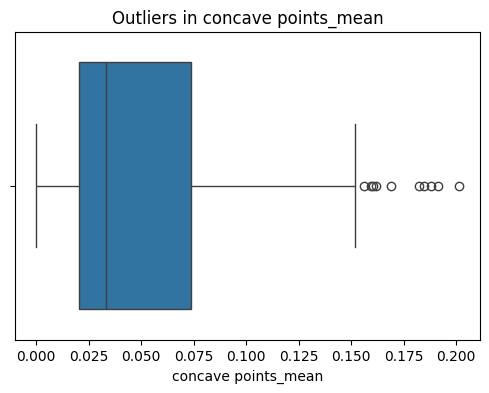

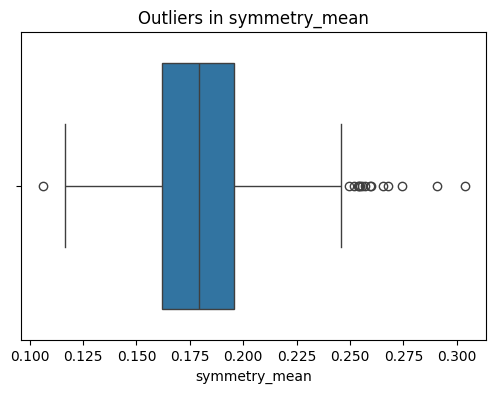

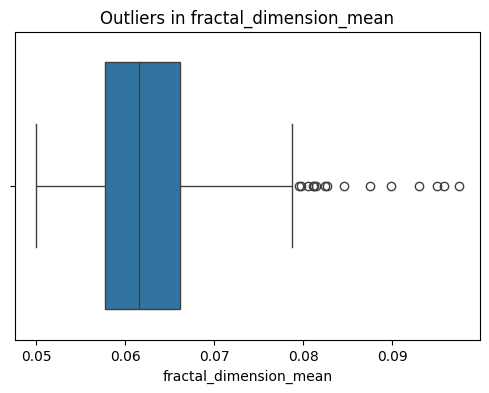

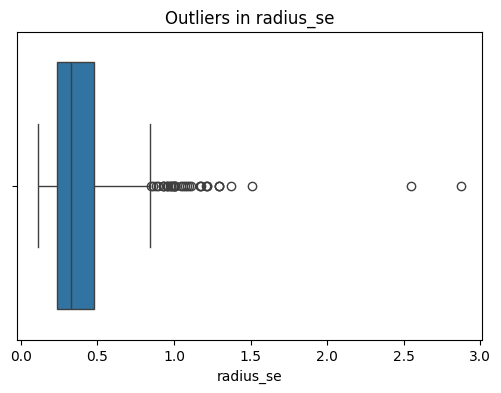

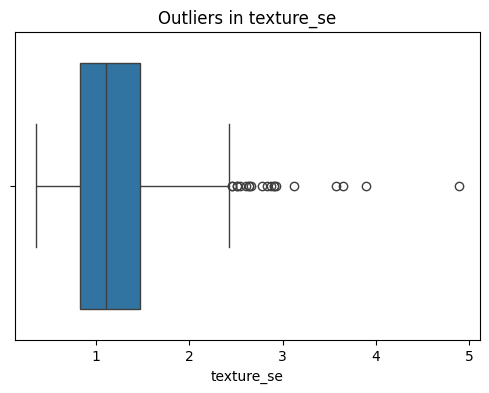

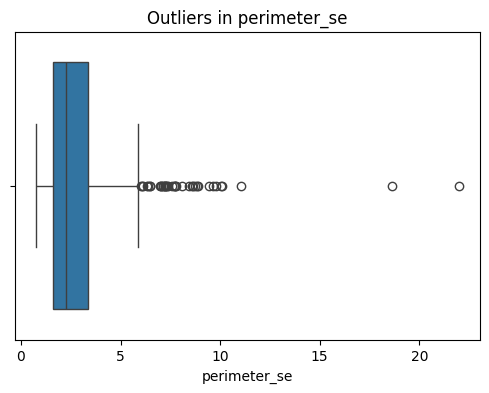

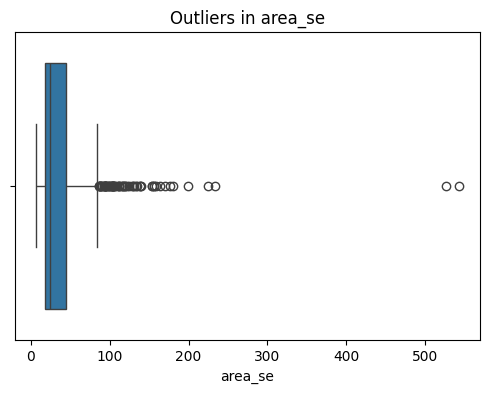

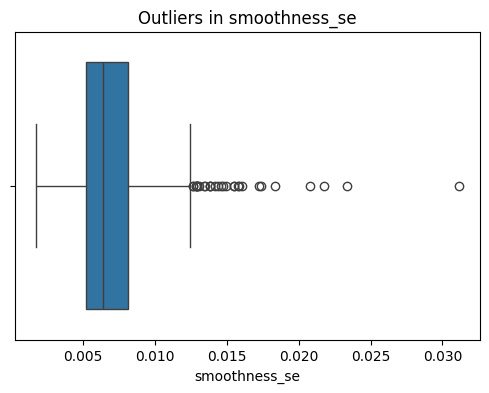

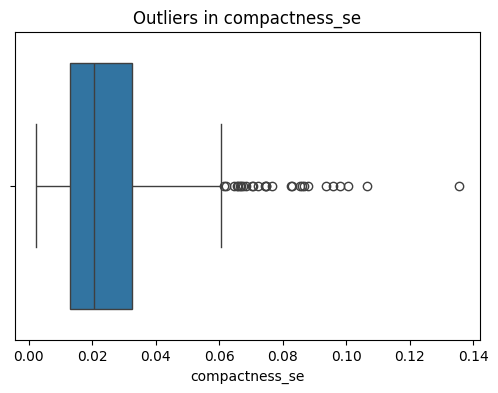

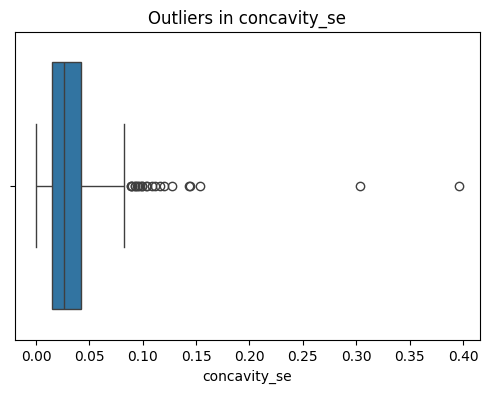

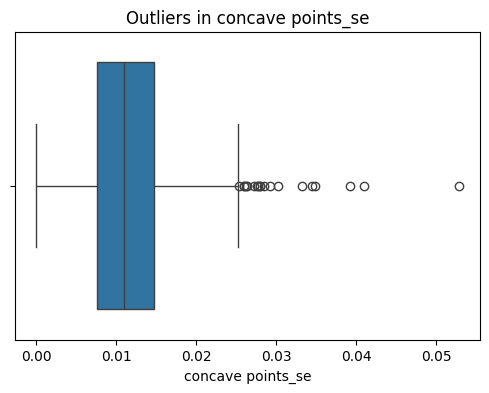

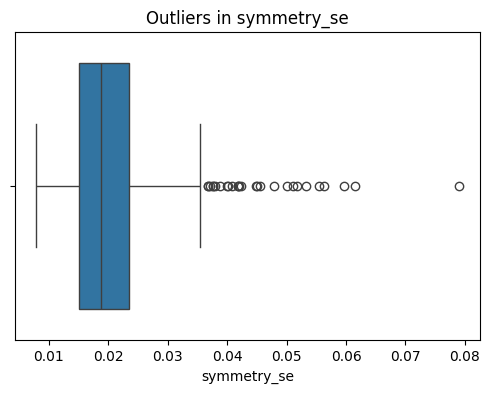

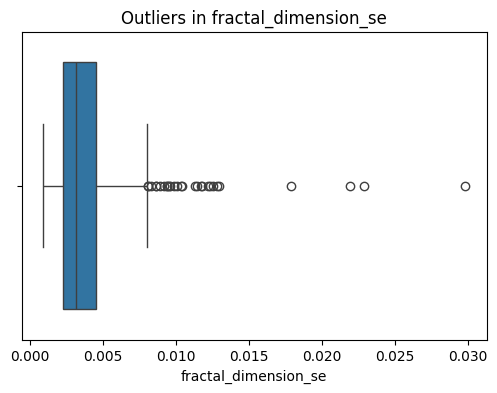

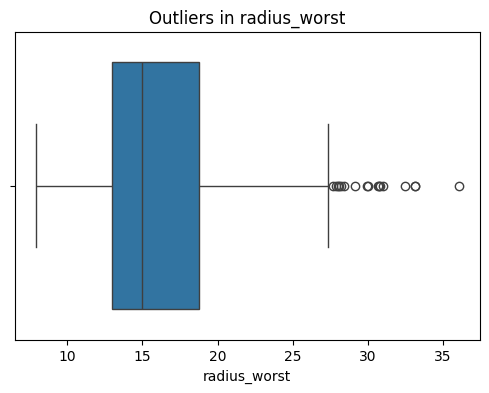

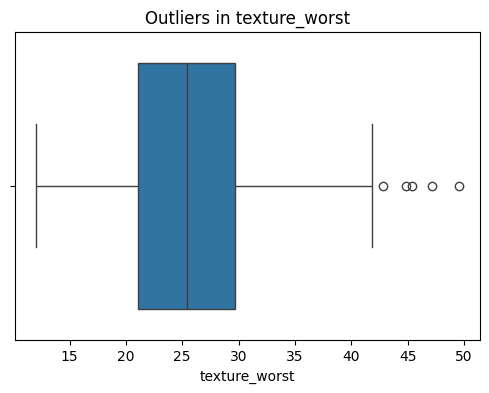

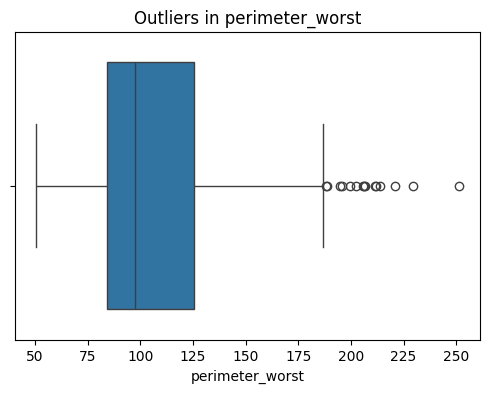

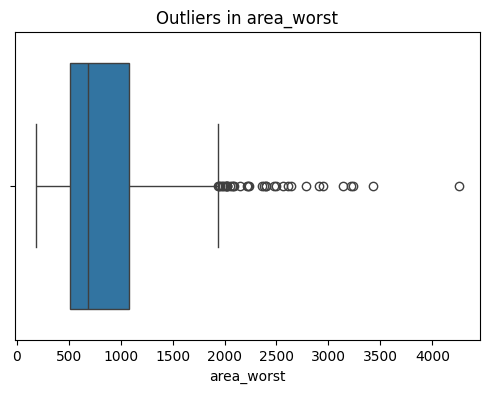

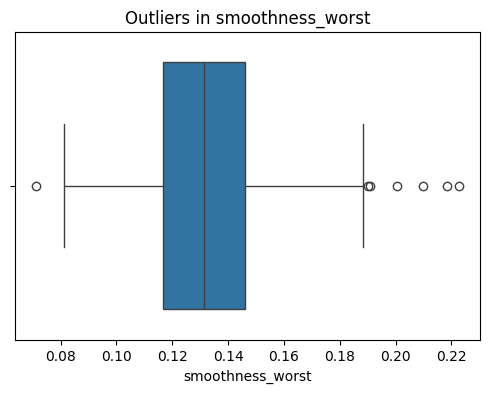

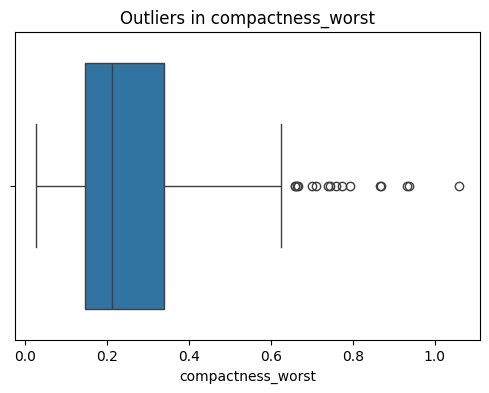

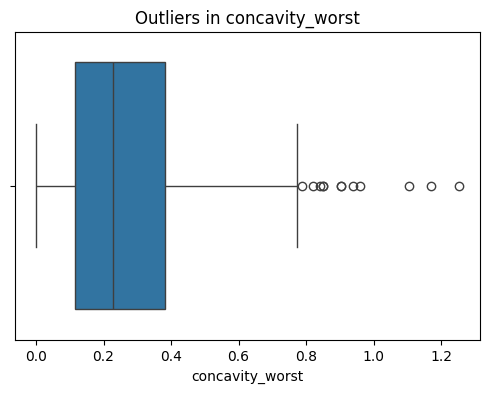

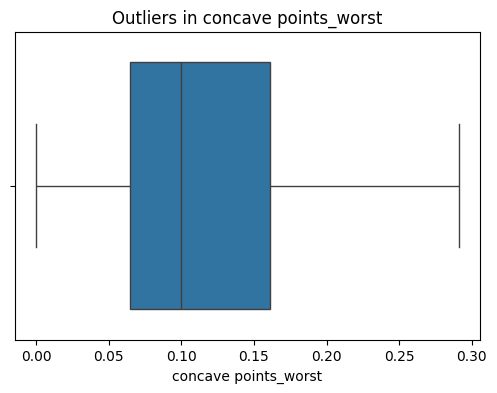

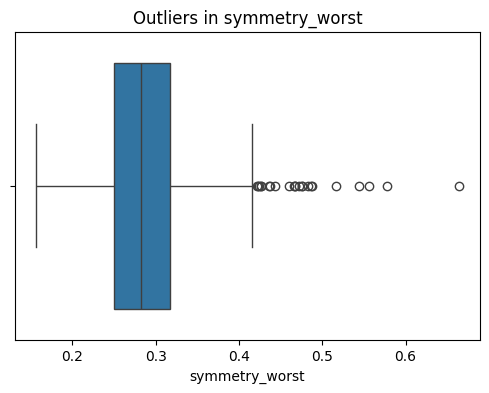

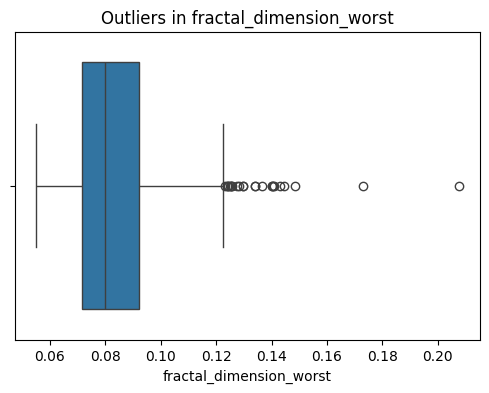

In [80]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [81]:
# Outlier flags for numeric cols (IQR)
outlier_summary = {}
for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df[c] < lower) | (df[c] > upper)).sum()
    outlier_summary[c] = outlier_count
pd.Series(outlier_summary).sort_values(ascending=False).head(20)

,0
area_se,65
radius_se,38
perimeter_se,38
area_worst,35
smoothness_se,30
fractal_dimension_se,28
compactness_se,28
symmetry_se,27
area_mean,25
fractal_dimension_worst,24


In [82]:
# Select numeric columns only
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Function to remove outliers using IQR
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap extreme values instead of removing (better for preserving dataset size)
        data[col] = np.where(data[col] < lower_bound, lower_bound,
                             np.where(data[col] > upper_bound, upper_bound, data[col]))
    return data

df = remove_outliers_iqr(df, num_cols)


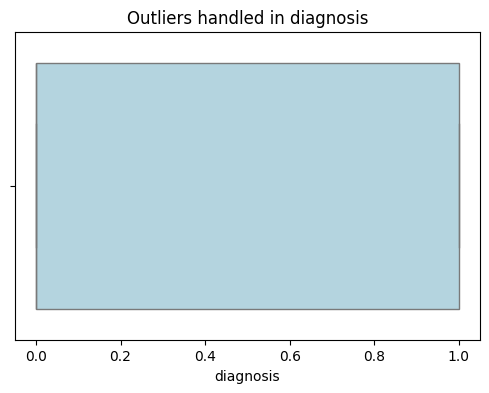

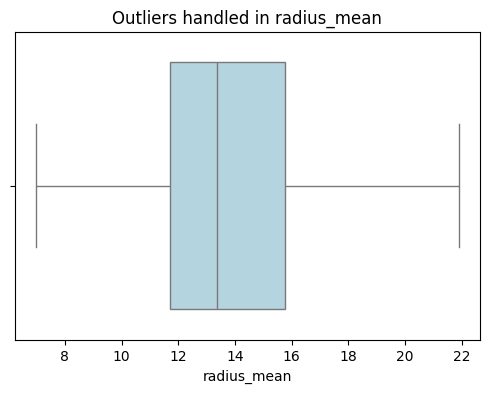

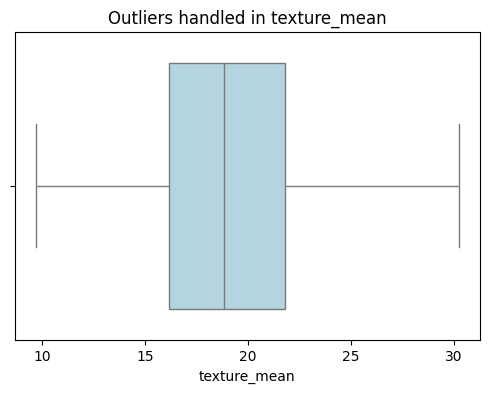

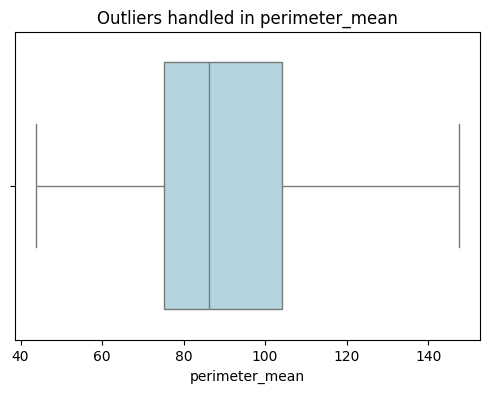

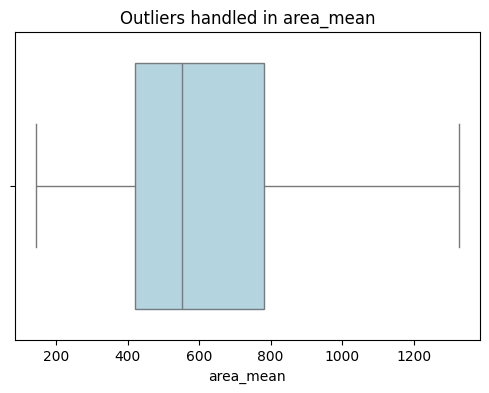

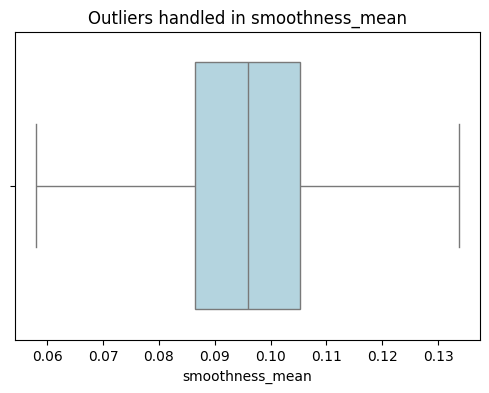

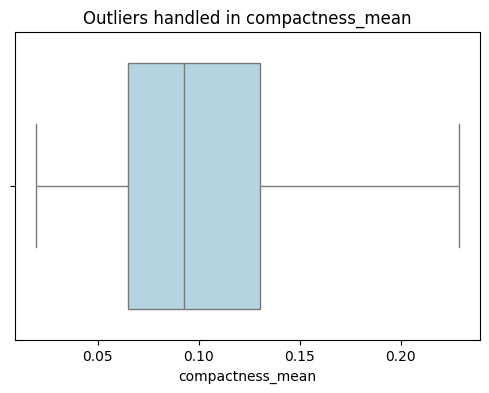

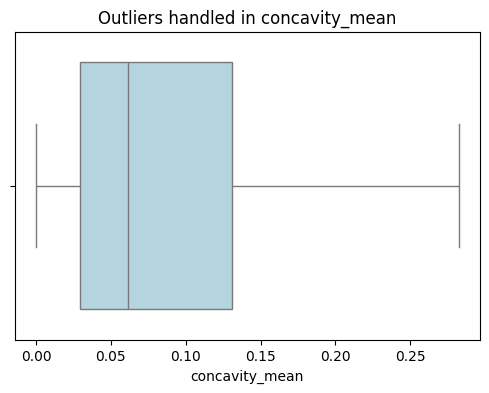

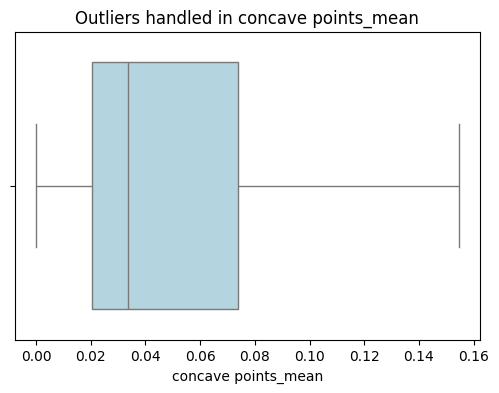

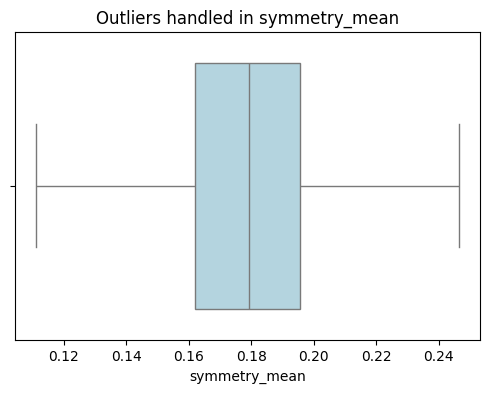

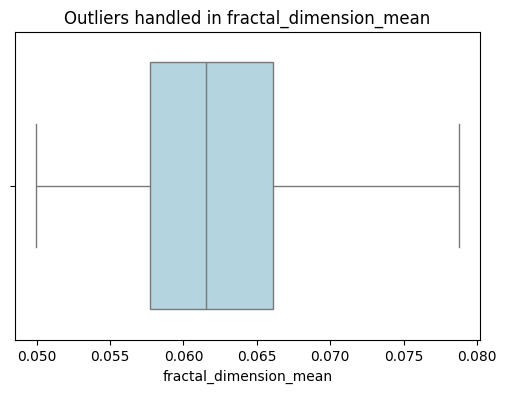

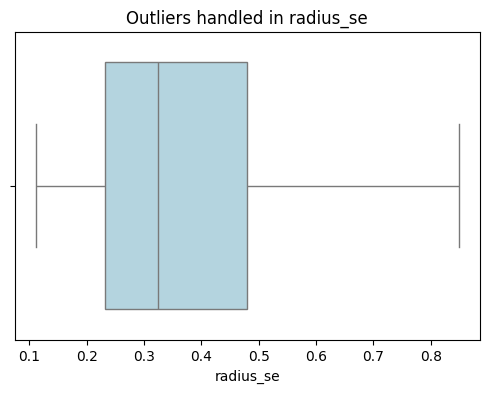

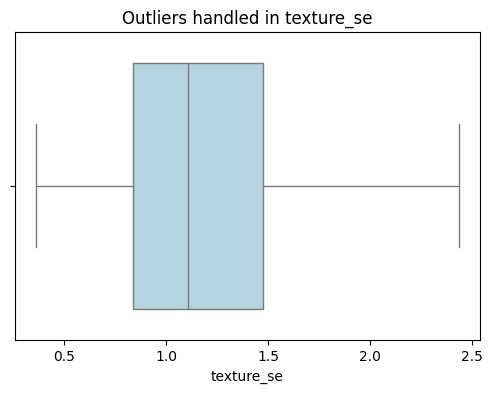

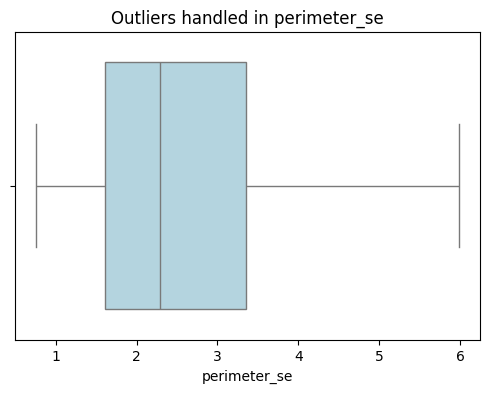

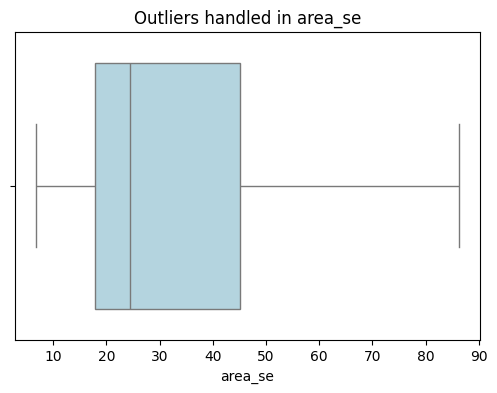

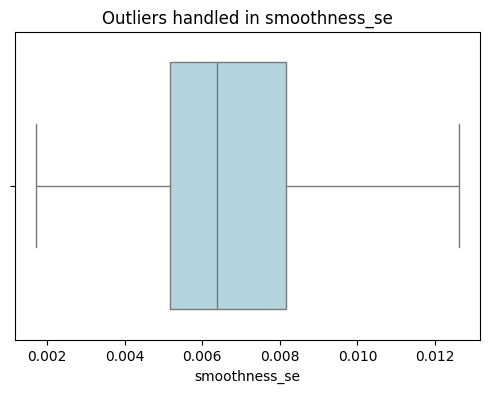

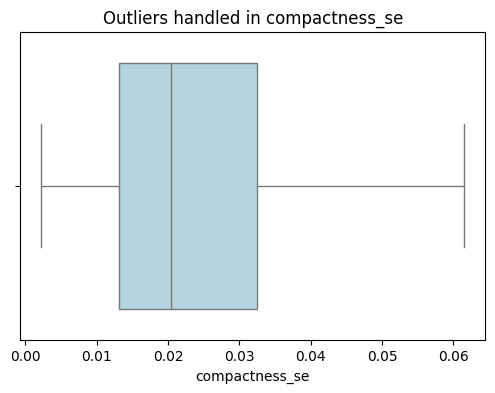

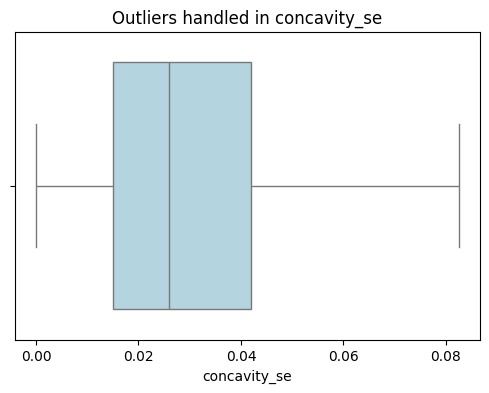

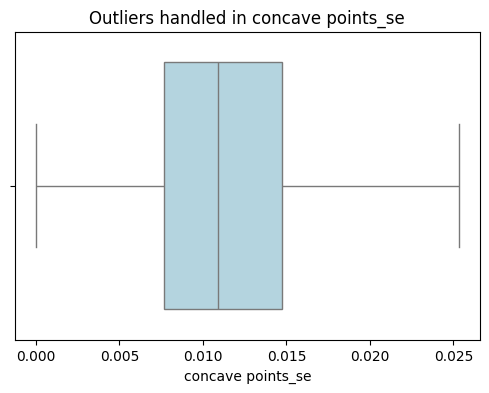

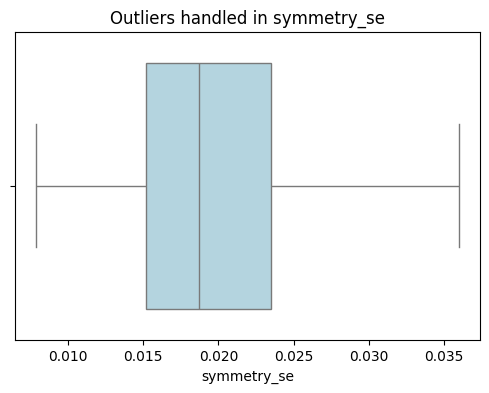

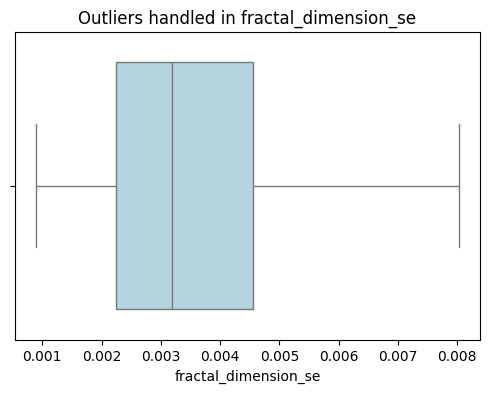

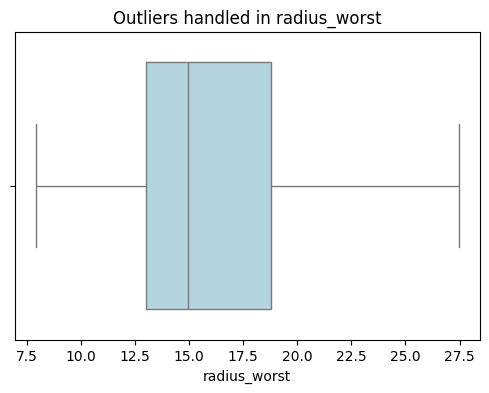

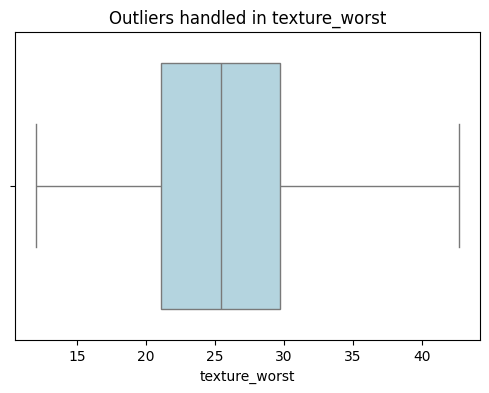

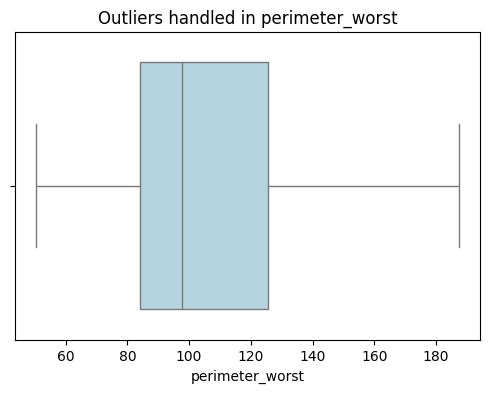

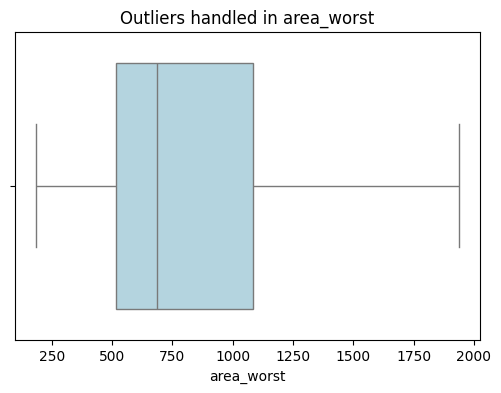

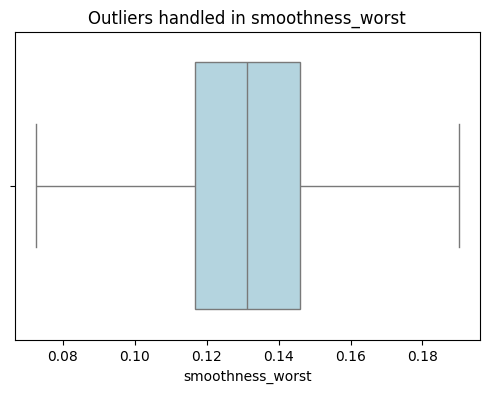

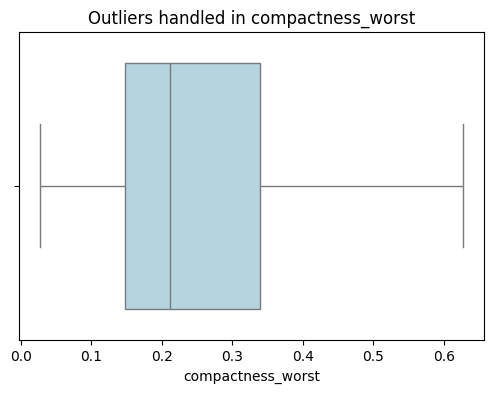

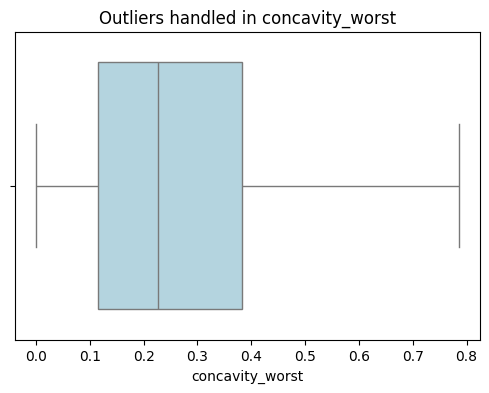

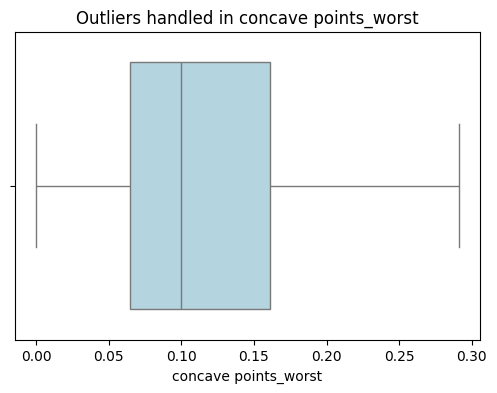

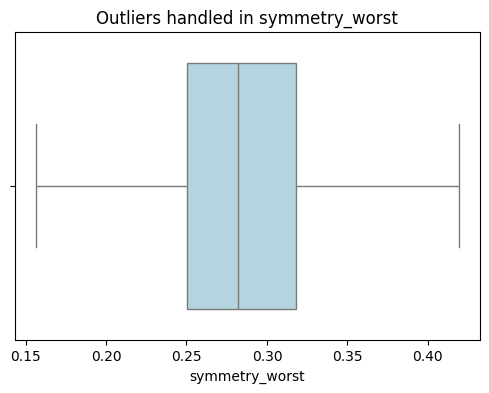

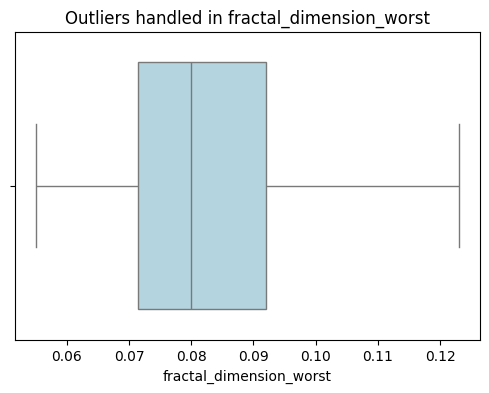

In [83]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Outliers handled in {col}")
    plt.show()

In [97]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [98]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [99]:
if 'diagnosis' in num_cols:
    num_cols.remove('diagnosis')
if 'diagnosis' in cat_cols:
    cat_cols.remove('diagnosis')

In [100]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [101]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [102]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', xgb)])

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

In [105]:
for train_idx, val_idx in kfold.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    pipeline.fit(X_tr, y_tr)
    preds = pipeline.predict(X_val)
    cv_results.append(f1_score(y_val, preds))

print("Average F1 Score:", sum(cv_results) / len(cv_results))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:10:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:10:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:10:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:10:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:10:27] WARNING: /w

Average F1 Score: 0.9198897460463075


In [106]:
print("Cross-Validation F1 scores:", cv_results)
print("Mean F1:", np.mean(cv_results))

Cross-Validation F1 scores: [0.9166666666666666, 0.96875, 0.9367088607594937, 0.9152542372881356, 0.8620689655172413]
Mean F1: 0.9198897460463075


In [107]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
}

In [108]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:11:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave '
                                                                          'points_mean',
                                                                          'symmetry_mean',
                                                                          'fractal_dimension_mean',
                                                                          'radius_se',
                                                                          'texture_se',
                                                                          'pe...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__subsample': [0.8, 1.0]},
             scoring='f1')

In [109]:
print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_

Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__subsample': 0.8}


In [110]:
y_pred = best_model.predict(X_test)

In [111]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
F1 Score: 0.9647058823529412
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



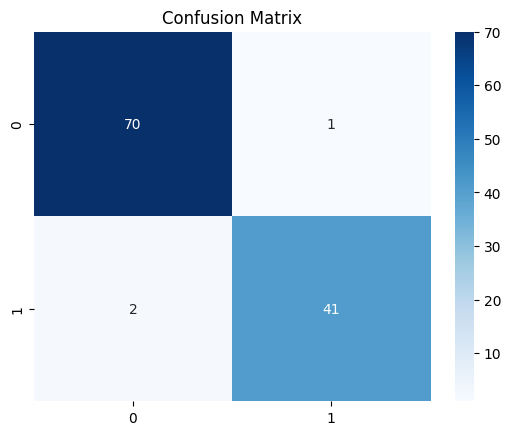

In [112]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.show()

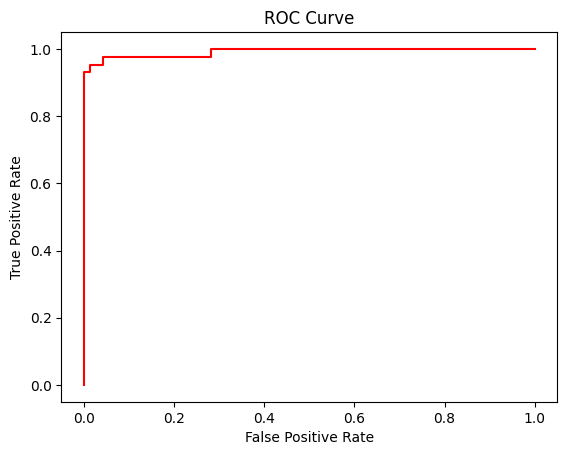

In [113]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [114]:
joblib.dump(best_model, "_model.pkl")
print("✅ Model saved as _model.pkl")

✅ Model saved as _model.pkl


# Model Tuning Reflection

### What Improved After Tuning

- The XGBoost model showed a noticeable improvement in both accuracy and F1 score after hyperparameter tuning.

- Cross-validation ensured the model's stability and consistency, reducing overfitting on the training set.

- Fine-tuning parameters like n_estimators, max_depth, and learning_rate helped the model achieve better generalization across folds.

### Challenges Faced

- Handling outliers and ensuring proper feature scaling was crucial, outliers initially skewed results and affected model reliability.

- The tuning process was computationally expensive and required multiple iterations to balance performance and runtime.

- Finding the optimal parameter range for XGBoost without overfitting took several experiment cycles.

### Key Insights

- XGBoost performed superior to Random Forest, particularly in detecting minority class samples due to its gradient boosting approach.

- Cross-validation (K-Fold) provided a more trustworthy performance estimate compared to a single train-test split.

- Incorporating outlier removal and scaling before training had a significant positive effect on model stability.

- Hyperparameter tuning isn’t just about boosting accuracy — it’s about achieving a balanced, reliable, and reproducible model suitable for deployment.